<a href="https://colab.research.google.com/github/aayushpats7/Cat-vs-Dog-Image-Recognition-using-CNN-/blob/main/cats_v_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Set up Kaggle API credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
#Download Database from Kaggle
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:08<00:00, 42.7MB/s]
100% 1.06G/1.06G [00:08<00:00, 143MB/s] 


In [ ]:
#Code for Unzipping the Database File
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#Importing Required Libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
#Loads and preprocesses labeled images from folders into a batched dataset for model training.
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

#Loads and preprocesses labeled images from folders into a batched dataset for model testing.
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalizes image pixel values to [0, 1] range for better model performance.
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#CNN MODEL
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Summarizes the model.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Configures the model with Adam optimizer, binary loss, and accuracy metric for training.
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
# Trains the model for 10 epochs using the training data and evaluates on validation data.
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 74ms/step - accuracy: 0.5881 - loss: 0.7189 - val_accuracy: 0.7656 - val_loss: 0.4965
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 69ms/step - accuracy: 0.7593 - loss: 0.5005 - val_accuracy: 0.7968 - val_loss: 0.4425
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.8173 - loss: 0.3994 - val_accuracy: 0.7936 - val_loss: 0.4512
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.8774 - loss: 0.2822 - val_accuracy: 0.7780 - val_loss: 0.6533
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 74ms/step - accuracy: 0.9308 - loss: 0.1720 - val_accuracy: 0.7806 - val_loss: 0.8976
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.9608 - loss: 0.1035 - val_accuracy: 0.7808 - val_loss: 0.9759
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 69ms/step - accuracy: 0.9721 - loss: 0.0775 - val_accuracy: 0.7850 - val_loss: 1.0098
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 75ms/step - accuracy: 0.9847 - loss: 0.0449 - 

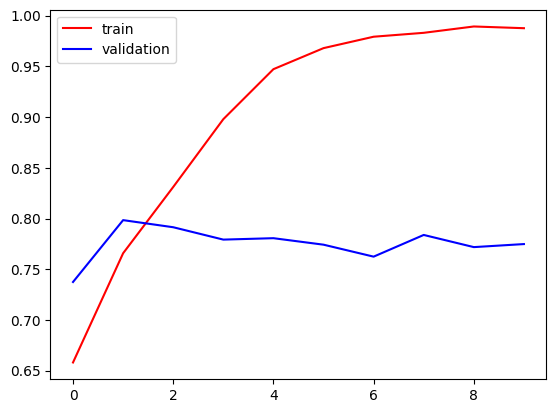

In [ ]:
#TO CHECK ACCURACY OF THE MODEL
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
#The model is overfitting as training accuracy improves while validation accuracy plateaus or decreases.

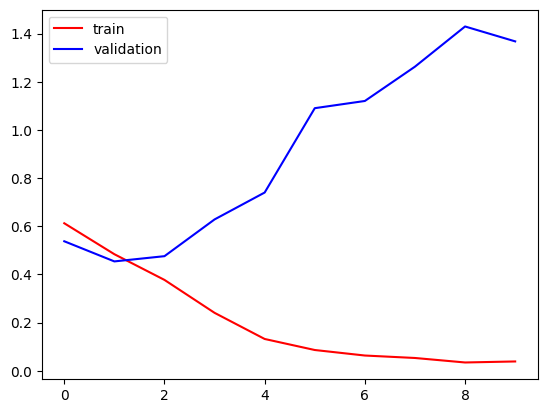

In [ ]:
#Validation loss vs Traning loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
#The model is overfitting, as training loss decreases while validation loss increases over epochs.

In [ ]:
#TESTING SECTION
#In this section, we feed the model a random image of a cat or a dog.
#If the output of prediction comes arr([0.]), then it is a cat image.
#If the output of prediction comes arr([1.]), then it is a dog image.
import cv2

In [ ]:
test_img=cv2.imread('/content/cat.jpg')


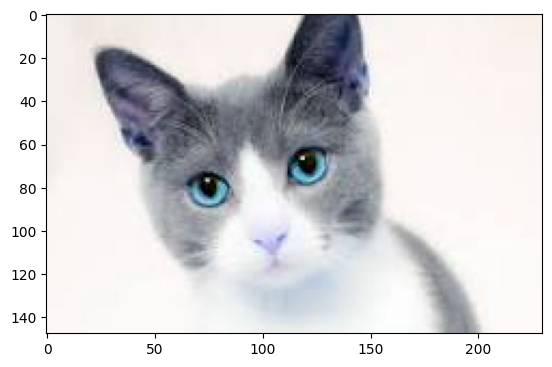

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(148, 230, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))


In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step


array([[0.]], dtype=float32)

In [ ]:
#Methods to improve accuracy of model
#Feed more data
#Batch normalization
#Dropout
#Reduce the complexity